<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Weights_codechallenge_identicalRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


In [3]:
#create a model
net=nn.Sequential(
    nn.Linear(2,8),  #input layer
    nn.Linear(8,1),  #hidden layer
    nn.Linear(1,1),  #output unit
)

Create the four networks

In [4]:
##No random seed
#create a 'template' network
net_noseed=copy.deepcopy(net)
#update the weights
for p in net_noseed.named_parameters():
    if 'weight' in p[0]:
      nn.init.xavier_normal_(p[1].data)

In [5]:
##Random seed 1a
##create a 'template' network
net_rs1a=copy.deepcopy(net)
#set the seed to 1
torch.manual_seed(1)
#update the weights
for p in net_rs1a.named_parameters():
    if 'weight' in p[0]:
      nn.init.xavier_normal_(p[1].data)

In [6]:
###RANDOM seed 2
#create a 'template' network
net_rs2=copy.deepcopy(net)
#set the seed to 2
torch.manual_seed(2)
#update the weights
for p in net_rs2.named_parameters():
    if 'weight' in p[0]:
      nn.init.xavier_normal_(p[1].data)

In [7]:
###RANDOM seed 1b
##create a 'template' network
net_rs1b=copy.deepcopy(net)
#set the seed to 1
torch.manual_seed(1)
#update the weights
for p in net_rs1b.named_parameters():
    if 'weight' in p[0]:
      nn.init.xavier_normal_(p[1].data)

Extract all weights form all network


In [8]:
#initialize empty arrays
w_ns=np.array([])
w_1a=np.array([])
w_2=np.array([])
w_1b=np.array([])
#loop over layers in the models
for i in range(3):
  #extract the vectorized weights matrices
  w_ns=np.append(w_ns,net_noseed[i].weight.detach().numpy().flatten())
  w_1a=np.append(w_1a,net_rs1a[i].weight.detach().numpy().flatten())
  w_2=np.append(w_2,net_rs2[i].weight.detach().numpy().flatten())
  w_1b=np.append(w_1b,net_rs1b[i].weight.detach().numpy().flatten())
#check
w_ns

array([-0.83233702, -0.0561881 ,  0.09147899, -0.26319855,  0.60876584,
       -0.478127  ,  0.50510222,  0.53457409,  0.20079803, -0.20306273,
       -0.04785665,  0.72747809,  0.36901981, -0.33478943, -0.74895126,
       -0.13081303, -0.07018673,  0.83674383, -0.95706207,  0.10673429,
       -0.11732225, -0.62296939,  0.06461935,  0.3538937 , -0.97672874])

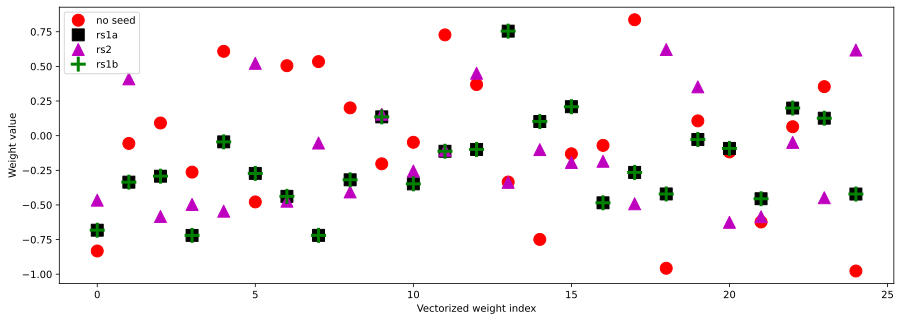

In [9]:
#plotting
fig=plt.figure(figsize=(15,5))
plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_1a,'ks',markersize=12,label='rs1a')
plt.plot(w_2 ,'m^',markersize=12,label='rs2')
plt.plot(w_1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [10]:
#thw algebric tesst
print('1a-1b should be zero:')
print( w_1a-w_1b )
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_1a-w_2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_1a-w_ns )
print('\n\n')


1a-1b should be zero:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078251 -0.22352022  0.50025801 -0.79460078
  0.03471264 -0.66646316  0.08751756 -0.01855947 -0.09211725 -0.0073103
 -0.55001713  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[ 0.15006977 -0.27932576 -0.38394813 -0.45658493 -0.65356196  0.20568943
 -0.9432697  -1.25418383 -0.51927879  0.33889133 -0.29976888 -0.83993229
 -0.46842219  1.08928946  0.8511061   0.33994599 -0.41423259 -1.10216945
  0.5364323  -0.13419369  0.02515815  0.16776425  0.13450914 -0.22787926
  0.55553359]



